In [1]:
import numpy as np
from keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions
from keras.preprocessing import image
import matplotlib.pyplot as plt

2024-05-30 13:01:36.244042: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the MobileNet model with pre-trained ImageNet weights
model = MobileNet(include_top=True, weights='imagenet')

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Check the parameters of prebuilt model.
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

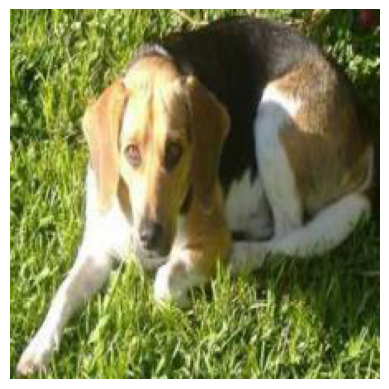

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# Trying to run model prediction with photo of beagle
image_path = "../Resources/cropped/train/n02088364-beagle/n02088364_3758.jpg"

# Load the image using PIL
img = Image.open(image_path)

# Resize the image if necessary
image_size = (224, 224)
img = img.resize(image_size)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

In [12]:
# change the image to an array 
img_array = image.img_to_array(img)

In [13]:
# expand the photo to fit the parameters of the model
img_array = np.expand_dims(img_array, axis=0)

In [14]:
# Preprocess the image for the MobileNet model
img_array = preprocess_input(img_array)

In [15]:
# Make a prediction
predictions = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


In [16]:
# Decode the predictions to get human-readable labels
decoded_predictions = decode_predictions(predictions, top=3)[0]


1: beagle (0.62)
2: English_foxhound (0.33)
3: Walker_hound (0.05)


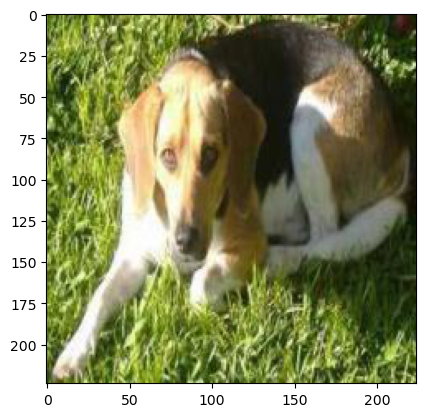

In [19]:
# show the photo and run a loop to generate results
plt.imshow(img)
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


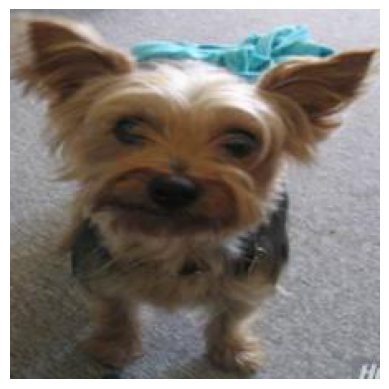

In [20]:
# Trying to run model prediction with photo of yorkshire terrior
image_path = "../Resources/cropped/train/n02094433-Yorkshire_terrier/n02094433_515.jpg"

# Load the image using PIL
img = Image.open(image_path)

# Resize the image if necessary
image_size = (224, 224)
img = img.resize(image_size)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1: Yorkshire_terrier (0.97)
2: silky_terrier (0.01)
3: toy_terrier (0.01)


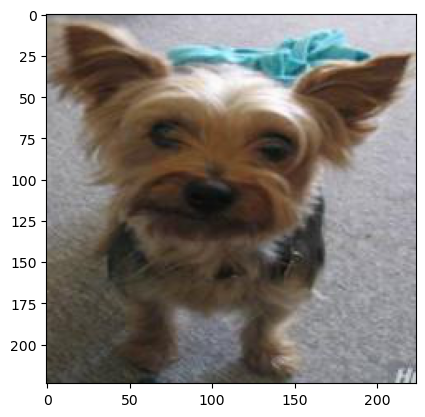

In [22]:
# change the image to an array 
img_array = image.img_to_array(img)

# expand the photo to fit the parameters of the model
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image for the MobileNet model
img_array = preprocess_input(img_array)

# Make a prediction
predictions = model.predict(img_array)

# Decode the predictions to get human-readable labels
decoded_predictions = decode_predictions(predictions, top=3)[0]

# show the photo and run a loop to generate results
plt.imshow(img)
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

In [23]:
results = decode_predictions(predictions)[0]
dic = [{'breed': res[1], 'prediction': res[2]} for res in results]

In [24]:
import pandas as pd

__df = pd.DataFrame(dic)

In [25]:
__df.head()

,breed,prediction
0,Yorkshire_terrier,0.970375
1,silky_terrier,0.014948
2,toy_terrier,0.010485
3,Australian_terrier,0.003030
4,cairn,0.000342


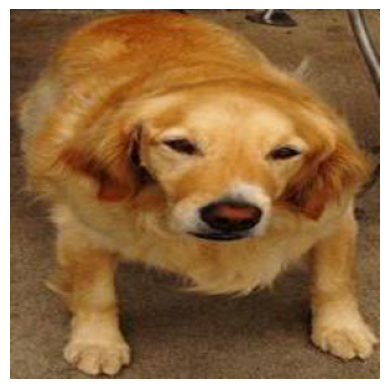

In [26]:
# Trying to run model prediction with photo of golden retriever
image_path = "../Resources/cropped/train/n02099601-golden_retriever/n02099601_704.jpg"

# Load the image using PIL
img = Image.open(image_path)

# Resize the image if necessary
image_size = (299, 299)
img = img.resize(image_size)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1: golden_retriever (0.99)
2: cocker_spaniel (0.00)
3: Labrador_retriever (0.00)


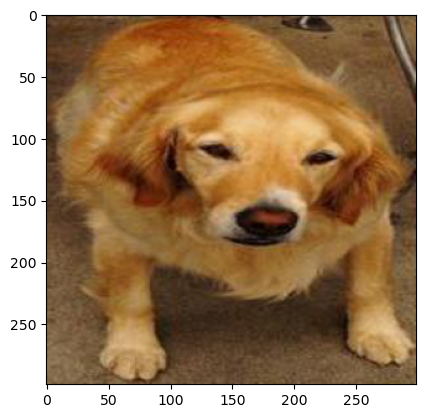

In [27]:
# change the image to an array 
img_array = image.img_to_array(img)

# expand the photo to fit the parameters of the model
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image for the MobileNet model
img_array = preprocess_input(img_array)

# Make a prediction
predictions = model.predict(img_array)

# Decode the predictions to get human-readable labels
decoded_predictions = decode_predictions(predictions, top=3)[0]

# show the photo and run a loop to generate results
plt.imshow(img)
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

In [28]:
# prepare the dataframe of results and write to csv
file_path = "../Outputs/mobile_net_model.csv"
__df.to_csv(file_path, index=False)
print(f"DataFrame wrote to csv successfully. ")

DataFrame wrote to csv successfully. 
